# 02 - Exploratory Data Analysis (EDA)

This notebook:
- Explores class distribution
- Analyzes text length distributions
- Shows sample texts per class
- Saves figures for the report

Purpose:
Understand dataset characteristics and identify potential issues.

In [1]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import yaml

ROOT = Path("..").resolve()
sys.path.insert(0, str(ROOT))

cfg = yaml.safe_load((ROOT / "configs/data.yaml").read_text())

df = pd.read_csv(ROOT / cfg["paths"]["raw_train_csv"])
fig_dir = ROOT / "report/figures"
fig_dir.mkdir(parents=True, exist_ok=True)

df["text"] = (df["title"].fillna("") + " " + df["description"].fillna("")).str.strip()
df["text_len_chars"] = df["text"].str.len()
df["text_len_words"] = df["text"].str.split().apply(len)

df.head()

,label,title,description,text,text_len_chars,text_len_words
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...,144,21
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...,266,36
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...,232,36
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...,256,36
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new...",234,37


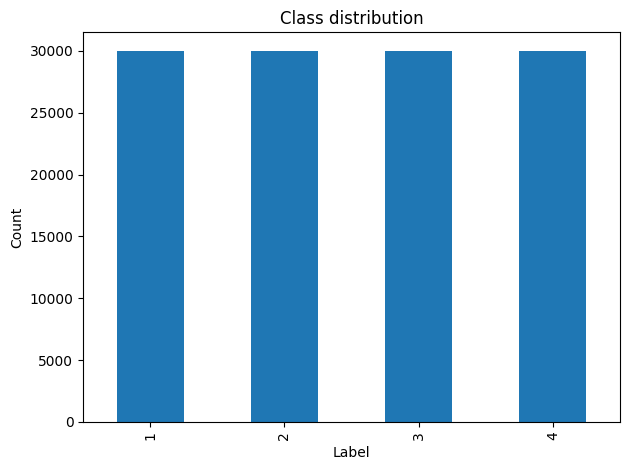

In [2]:
ax = df["label"].value_counts().sort_index().plot(kind="bar")
ax.set_title("Class distribution")
ax.set_xlabel("Label")
ax.set_ylabel("Count")
plt.tight_layout()
plt.savefig(fig_dir / "class_distribution.png", dpi=200)
plt.show()


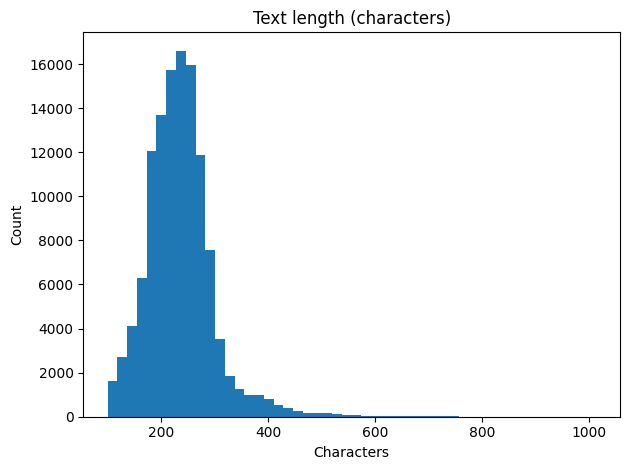

In [3]:
plt.figure()
plt.hist(df["text_len_chars"], bins=50)
plt.title("Text length (characters)")
plt.xlabel("Characters")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(fig_dir / "text_len_chars_hist.png", dpi=200)
plt.show()

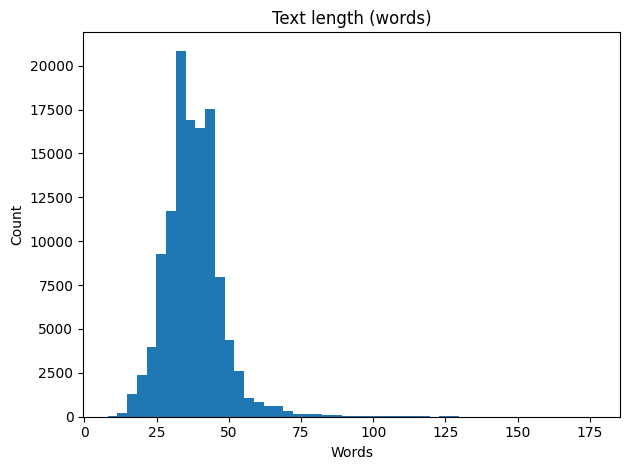

In [4]:
plt.figure()
plt.hist(df["text_len_words"], bins=50)
plt.title("Text length (words)")
plt.xlabel("Words")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(fig_dir / "text_len_words_hist.png", dpi=200)
plt.show()

In [6]:
for label in sorted(df["label"].unique()):
    print(f"\n===== LABEL {label} =====")
    ex = df[df["label"] == label].sample(3, random_state=cfg["data"]["seed"])
    for _, row in ex.iterrows():
        print("-", str(row["text"])[:250].replace("\n", " "), "...")


===== LABEL 1 =====
- Explosion Rocks Baghdad Neighborhood BAGHDAD, Iraq, August 24 -- A car bomb exploded near the gate of a US-funded Iraqi television network in Baghdad on Tuesday, killing at least two people and wounding two others, authorities and witnesses said. ...
- BBC reporters' log BBC correspondents record events in the Middle East and their thoughts as the funeral of the Palestinian leader Yasser Arafat takes place. ...
- Israel welcomes Rice nomination; Palestinians wary Israel on Tuesday warmly welcomed the naming of Condoleezza Rice as America #39;s top diplomat, but Palestinians were wary, saying the new Bush administration must put more energy into the quest for  ...

===== LABEL 2 =====
- Second Andre win in a row boosts US gold medal hopes Andre Dirrell, fighting with a tattoo of his grandfather #39;s face on his back, assured the United States of at least two boxing medals Wednesday by narrowly beating Cuba #39;s Yordani Despaigne t ...
- NFL Game Summary - Kansas

In [7]:
obs = []

counts = df["label"].value_counts().sort_index()
obs.append("Class distribution (balanced?): " + ", ".join([f"{k}={v}" for k, v in counts.items()]))

obs.append(f"Chars length: median={df['text_len_chars'].median():.0f}, p95={df['text_len_chars'].quantile(0.95):.0f}, max={df['text_len_chars'].max():.0f}")
obs.append(f"Words length: median={df['text_len_words'].median():.0f}, p95={df['text_len_words'].quantile(0.95):.0f}, max={df['text_len_words'].max():.0f}")

missing = df[["label","title","description"]].isna().sum()
obs.append("Missing values: " + ", ".join([f"{k}={int(v)}" for k, v in missing.items()]))

print("\n".join(["- " + o for o in obs]))

- Class distribution (balanced?): 1=30000, 2=30000, 3=30000, 4=30000
- Chars length: median=232, p95=343, max=1012
- Words length: median=37, p95=53, max=177
- Missing values: label=0, title=0, description=0


test

In [ ]:
import torch
from src.data.dataloaders import make_loaders

train_csv = ROOT / "data/processed" / "train.csv"
val_csv   = ROOT / "data/processed" / "val.csv"

tokenizer, train_loader, val_loader = make_loaders(
    train_csv=train_csv,
    val_csv=val_csv,
    tokenizer_name=cfg["transformer"]["model_name"],
    text_cols=["title", "description"],     
    sep=" ",
    lowercase=False,
    max_length=cfg["data"]["max_length"],
    batch_size=cfg["data"]["batch_size"],
    num_workers=2,
    shuffle_train=True,
)

batch = next(iter(train_loader))
{k: v.shape for k, v in batch.items()}

c:\Users\daois\anaconda3\envs\env1_adultcensus\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\daois\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


{'input_ids': torch.Size([32, 128]),
 'attention_mask': torch.Size([32, 128]),
 'labels': torch.Size([32])}